Problem 1 :A cloth manufacturing company is interested to know about the different attributes contributing to high sales. Build a decision tree & random forest model with Sales as target variable (first convert it into categorical variable).
___________________________________________________________________________________________________________________________________________________________

Business Objective :

Maximize:

High Sales Prediction Accuracy : Correctly identify factors contributing to high sales with high classification accuracy.
Maximize the ability to predict high-sales categories to improve marketing and inventory strategies.                                                    
Feature Impact Insights : Gain actionable insights into critical features (e.g., Price, Advertising) that positively influence sales.

Minimize:

Misclassification Rate :Reduce errors in predicting sales categories (e.g., predicting low sales when it’s actually high sales).                        
Overfitting Risk:Avoid building a model that overfits the training data, ensuring it generalizes to real-world scenarios.                               
Feature Redundancy:Minimize the impact of irrelevant or redundant features to enhance model simplicity and interpretability.

Contraints :

Class Imbalance: The dataset may have an uneven distribution of high and low sales categories, leading to biased predictions.                           
Model Complexity:Decision trees may overfit the training data, requiring proper pruning or hyperparameter tuning.Random forests are computationally expensive for large datasets, which may limit their scalability.

In [1]:
#Importing all the libraries required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
#Data Dictionary 
#Sales-Continous data
#CompanyPrice - Continous data
#Advertising - Continous data
#Income - Continous data
#Population - Contnious data
#Shelveloc - Categorical data
#Age - Dicreate data
#Education -Discreat data
#Urban - Categorical data
#US - Categorical data


In [7]:
df.dtypes  

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [13]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

(array([ 96.,   0.,   0.,   0.,   0.,  85.,   0.,   0.,   0., 219.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

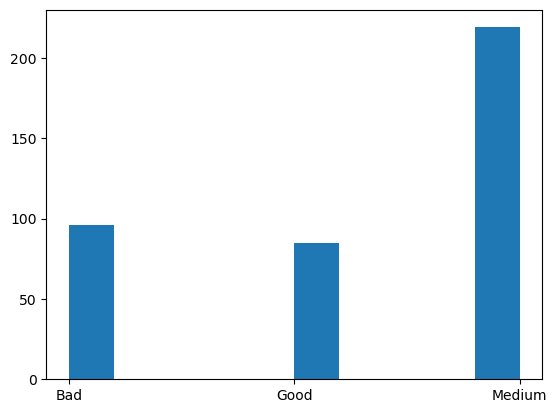

In [15]:
plt.hist(df["ShelveLoc"])

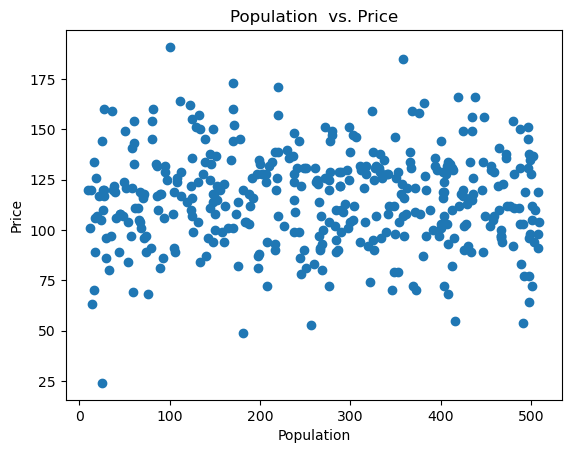

In [17]:
#Bivariate Analysis
plt.scatter(df['Population'], df['Price'])
plt.title('Population  vs. Price')
plt.xlabel('Population')
plt.ylabel('Price')
plt.show()

In [19]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [21]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,True,True
1,11.22,111,48,16,260,83,1,65,10,True,True
2,10.06,113,35,10,269,80,2,59,12,True,True
3,7.40,117,100,4,466,97,2,55,14,True,True
4,4.15,141,64,3,340,128,3,38,13,True,False


In [23]:
#now we want to spli tree, we need all feature columns
colnames=list(df.columns)

In [25]:
predictors=colnames[:10]
target=colnames[10]

In [27]:
#splitting data into trainng and testing datasets
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier as DT

In [31]:
model=DT(criterion='entropy')
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy')

In [33]:
#Prediction on test data
preds=model.predict(test[predictors])
pd.crosstab(test[target],preds,rownames=['Actual'],colnames=['Predicted'])

Predicted,False,True
Actual,,
False,29,3
True,7,41


In [35]:
np.mean(preds==test[target]) #Test data accuracy

0.875

In [37]:
#prediction on train data
preds=model.predict(train[predictors])
pd.crosstab(train[target],preds,rownames=['Actual'],colnames=['Predicted'])

Predicted,False,True
Actual,,
False,110,0
True,0,210


In [77]:
##Random Forest Classification

X = df.drop(columns=['Urban_Yes', 'US_Yes'])
y = df['US_Yes']


In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [81]:
#model selection
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=500,n_jobs=1,random_state=42)
#n_estimators is the nmber of trees in the forest, always range from 500 to 1000
#n_jobs=1 means number of tasks running prallel, if it is -1 then it means multiple jobs run parallel
#random_state controls the randomness of bootstraping
#Bootstraping is getting samples replaced

In [83]:
rand_for.fit(X_train,y_train)
pred_X_train=rand_for.predict(X_train)
pred_X_test=rand_for.predict(X_test)

In [85]:
#Let us check the performane of the model
from sklearn.metrics import accuracy_score, confusion_matrix
#for test data
accuracy_score(pred_X_test,y_test)

0.9416666666666667

In [87]:
confusion_matrix(pred_X_test,y_test)

array([[45,  3],
       [ 4, 68]], dtype=int64)

In [89]:
#for taining dataset
accuracy_score(pred_X_train,y_train)

1.0

In [91]:
confusion_matrix(pred_X_train,y_train)

array([[ 93,   0],
       [  0, 187]], dtype=int64)